In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sales_data = pd.read_csv('sales_data.csv')

In [3]:
sales_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [5]:
#Convert the 'Order Date' to 'Time'
sales_data['Time'] = pd.to_datetime(sales_data['Order Date'])

# After that we added hour from Time column
sales_data['Hour'] = (sales_data['Time']).dt.hour
sales_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Time
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2019-12-30 00:01:00
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2019-12-29 07:03:00
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,2019-12-12 18:21:00
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,2019-12-22 15:13:00
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,2019-12-18 12:38:00


In [7]:
# n = 24 hours, busiest hours
time1 = sales_data['Hour'].value_counts().index.tolist()[:24] 
time2 = sales_data['Hour'].value_counts().values.tolist()[:24]

In [9]:
tmost = np.column_stack((time1, time2))

print(" Hour Of Day" + "\t" + "Number of Purchases \n")
print('\n'.join('\t\t'.join(map(str, row)) for row in tmost))

 Hour Of Day	Number of Purchases 

19		12905
12		12587
11		12411
18		12280
20		12228
13		12129
14		10984
10		10944
21		10921
17		10899
16		10384
15		10175
22		8822
9		8748
23		6275
8		6256
7		4011
0		3910
6		2482
1		2350
5		1321
2		1243
4		854
3		831


In [11]:
timemost = sales_data['Hour'].value_counts().sort_index()
time1 = timemost.index.tolist()  # Hours (0 to 23)
time2 = timemost.values.tolist()

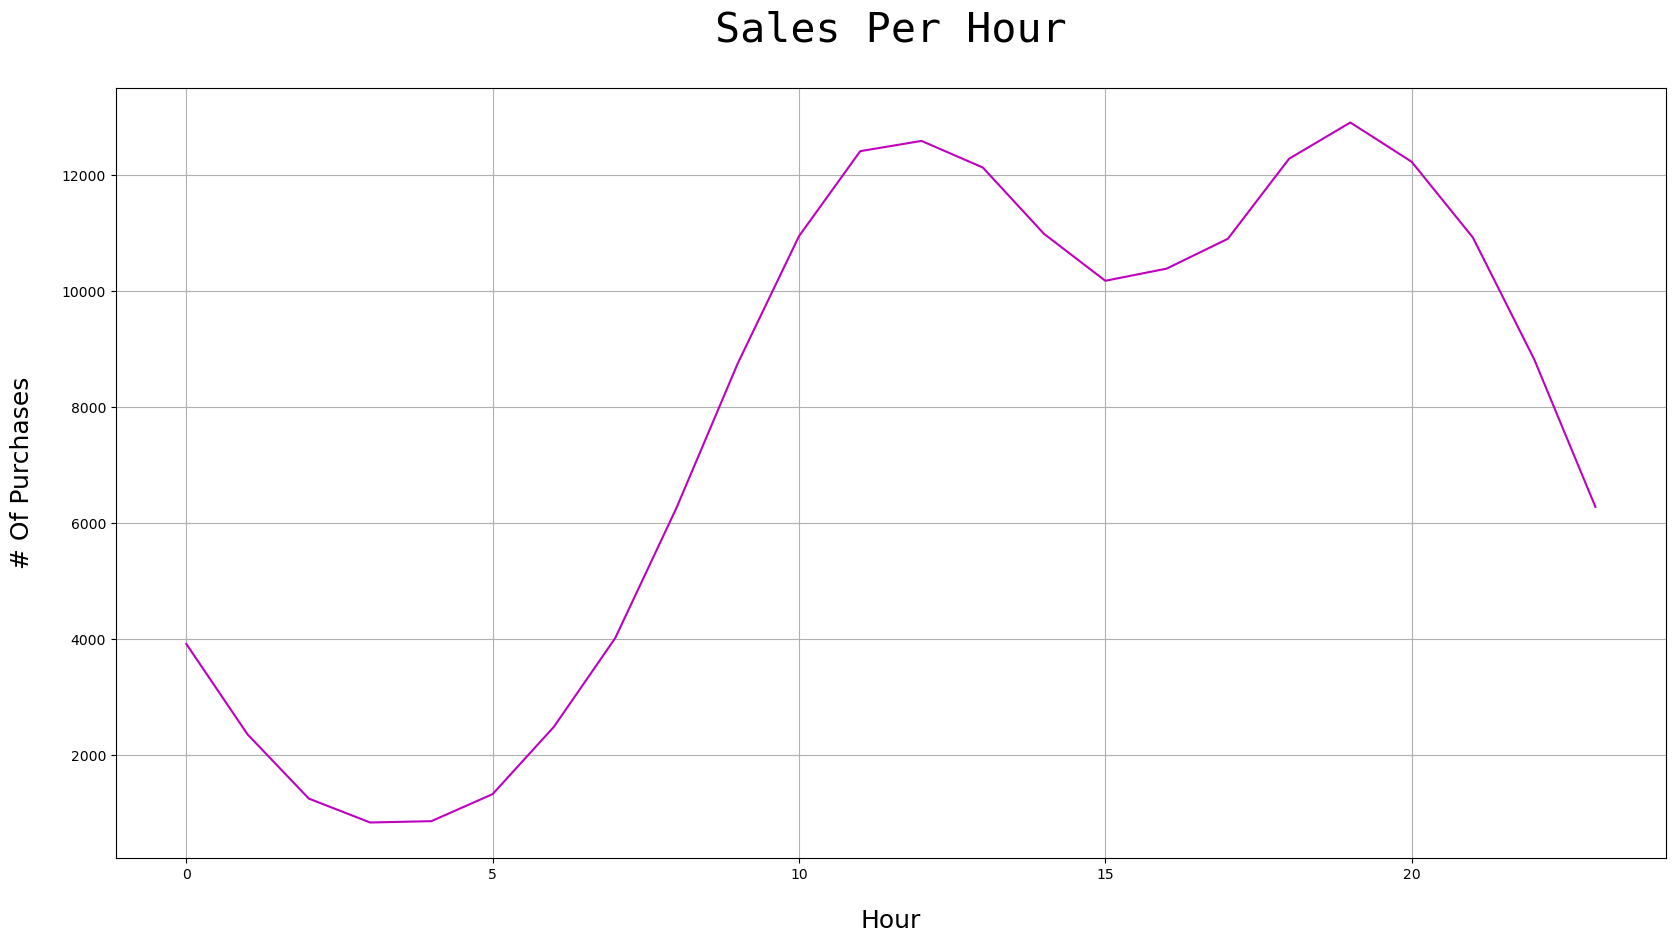

In [13]:
plt.figure(figsize=(20, 10))

plt.title('Sales Per Hour',
          fontdict={'fontname': 'monospace', 'fontsize': 30}, y=1.05)

plt.ylabel("# Of Purchases", fontsize=18, labelpad=20)
plt.xlabel("Hour", fontsize=18, labelpad=20)
plt.plot(time1, time2, color='m')
plt.grid()
plt.show()